In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [12]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [13]:
!labelme

D:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\Aman Joharapurkar\.labelmerc


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
images

In [8]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
type(images)

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

In [ ]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()


#This line creates a Matplotlib figure (fig) and an array of subplots (ax) organized in 4 columns (ncols=4)
#with a specified figure size of 20x20 inches (figsize=(20, 20)).You will have four subplots arranged horizontally.

#idx ->index of current image image->actual image
# Inside the loop, it uses ax[idx] to access the subplot at index idx. It then uses Matplotlib's imshow() 
# function to display the current image in the subplot.

MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
# 90*.7 # 63 to train

In [ ]:
# 90*.15 # 14 and 13 to test and val

In [21]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)
        

The provided code is a Python script that iterates through three folders: 'train', 'test', and 'val', and for each folder, it looks for files in the 'images' subfolder. For each image file, it checks if a corresponding JSON file with the same base filename exists in the 'labels' subfolder. If such a JSON file exists, it moves (or replaces) it from the 'data/labels' directory to the corresponding 'data/<folder>/labels' directory. Here's a step-by-step explanation of how this code works:

1. Loop Over Folders:
   ```python
   for folder in ['train', 'test', 'val']:
   ```
   This outer loop iterates through the three folders: 'train', 'test', and 'val'. The code inside this loop will be executed separately for each of these folders.

2. List Files in the 'images' Subfolder:
   ```python
   for file in os.listdir(os.path.join('data', folder, 'images')):
   ```
   Inside each folder, the script uses `os.listdir` to list the files in the 'images' subfolder. It joins the folder path with 'images' to create the full path to the 'images' subfolder.

3. Generate JSON File Path:
   ```python
   filename = file.split('.')[0] + '.json'
   ```
   For each image file, the code splits the filename using a period ('.') as the separator to remove the file extension (e.g., '.jpg' or '.png'). It then adds '.json' to the base filename to generate the corresponding JSON file's name.

4. Check if JSON File Exists:
   ```python
   existing_filepath = os.path.join('data', 'labels', filename)
   if os.path.exists(existing_filepath):
   ```
   The script constructs the full path to the existing JSON file by joining 'data', 'labels', and the generated JSON filename. It checks if this JSON file exists in the 'data/labels' directory.

5. Move JSON File to New Location:
   ```python
   new_filepath = os.path.join('data', folder, 'labels', filename)
   os.replace(existing_filepath, new_filepath)
   ```
   If the JSON file exists in 'data/labels', the code generates the new destination path by joining 'data', the current folder ('train', 'test', or 'val'), 'labels', and the JSON filename. It then uses `os.replace` to move (or replace) the JSON file from the 'data/labels' directory to the corresponding 'data/<folder>/labels' directory.

In summary, this script is designed to organize JSON label files associated with image files. It does this by checking each image file in the 'images' subfolder of the 'train', 'test', and 'val' folders. If a corresponding JSON file exists in the 'data/labels' directory, it is moved to the appropriate 'data/<folder>/labels' directory, where `<folder>` is the current iteration's folder name ('train', 'test', or 'val'). This script is useful for managing datasets with associated label files in a structured way.

In [9]:
import albumentations as alb

D:\Anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [10]:
img = cv2.imread(os.path.join('data','train', 'images','a9b85026-4c5e-11ee-9c00-4cebbd43a3fe.jpg'))
img.shape

(480, 640, 3)

In [11]:
# (x_min, y_min, x_max, y_max) -> albumentation 
# normalize values, we divide coordinates in pixels for the x- and y-axis
# by the width and the height of the image.

augmentor = alb.Compose([alb.RandomCrop(width = 450,height = 450),
                         alb.HorizontalFlip(p = 0.5),
                         alb.RandomBrightnessContrast(p = 0.2),
                         alb.RandomGamma(p = 0.2),
                         alb.RGBShift(p = 0.2),
                         alb.VerticalFlip(p = 0.5)],
                        bbox_params = alb.BboxParams(format = 'albumentations',
                                                     label_fields = ['class_labels']))

In [12]:
img = cv2.imread(os.path.join('data','train', 'images','a9b85026-4c5e-11ee-9c00-4cebbd43a3fe.jpg'))
img

array([[[242, 233, 224],
        [243, 234, 225],
        [242, 230, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[241, 232, 223],
        [242, 233, 224],
        [242, 230, 224],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 237, 230],
        [248, 238, 231],
        [246, 236, 229],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[227, 213, 201],
        [230, 216, 204],
        [230, 218, 206],
        ...,
        [169, 159, 182],
        [167, 157, 180],
        [167, 157, 180]],

       [[232, 217, 208],
        [229, 214, 205],
        [227, 215, 205],
        ...,
        [169, 161, 184],
        [159, 151, 174],
        [160, 151, 177]],

       [[234, 219, 210],
        [229, 214, 205],
        [228, 216, 206],
        ...,
        [166, 159, 180],
        [150, 141, 167],
        [155, 146, 172]]

In [13]:
with open(os.path.join('data','train','labels','a9b85026-4c5e-11ee-9c00-4cebbd43a3fe.json'), 'r') as f:
    label = json.load(f)

In [14]:
type(label)

dict

In [15]:
label['shapes']

[{'label': 'Face',
  'points': [[345.96153846153845, 167.88461538461542],
   [578.6538461538461, 425.5769230769231]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {}}]

In [16]:
type(label['shapes'])

list

In [17]:
label['shapes'][0]

{'label': 'Face',
 'points': [[345.96153846153845, 167.88461538461542],
  [578.6538461538461, 425.5769230769231]],
 'group_id': None,
 'description': '',
 'shape_type': 'rectangle',
 'flags': {}}

In [18]:
label['shapes'][0]['label']

'Face'

In [19]:
label['shapes'][0]['points']

[[345.96153846153845, 167.88461538461542],
 [578.6538461538461, 425.5769230769231]]

In [20]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [21]:
coords

[345.96153846153845, 167.88461538461542, 578.6538461538461, 425.5769230769231]

In [22]:
coords = list(np.divide(coords,[640,480,640,480]))

In [23]:
coords

[0.5405649038461539,
 0.3497596153846155,
 0.9041466346153845,
 0.8866185897435898]

In [24]:
augmented = augmentor(image = img,bboxes = [coords], class_labels = ['face'])

In [25]:
augmented

{'image': array([[[236, 255, 252],
         [236, 255, 252],
         [236, 255, 252],
         ...,
         [236, 255, 245],
         [236, 255, 247],
         [236, 255, 249]],
 
        [[236, 255, 252],
         [236, 255, 252],
         [236, 255, 252],
         ...,
         [236, 255, 250],
         [236, 255, 251],
         [236, 255, 249]],
 
        [[236, 255, 252],
         [236, 255, 252],
         [236, 255, 252],
         ...,
         [236, 255, 250],
         [236, 255, 250],
         [236, 255, 246]],
 
        ...,
 
        [[ 57,  89,  66],
         [ 58,  90,  69],
         [ 53,  86,  65],
         ...,
         [225, 255, 233],
         [226, 255, 234],
         [216, 251, 224]],
 
        [[ 59,  91,  68],
         [ 57,  89,  68],
         [ 53,  86,  65],
         ...,
         [227, 255, 236],
         [224, 255, 232],
         [218, 253, 227]],
 
        [[ 58,  90,  67],
         [ 52,  85,  64],
         [ 51,  83,  63],
         ...,
         [226, 255,

In [26]:
type(augmented)

dict

In [27]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [28]:
augmented['image']

array([[[236, 255, 252],
        [236, 255, 252],
        [236, 255, 252],
        ...,
        [236, 255, 245],
        [236, 255, 247],
        [236, 255, 249]],

       [[236, 255, 252],
        [236, 255, 252],
        [236, 255, 252],
        ...,
        [236, 255, 250],
        [236, 255, 251],
        [236, 255, 249]],

       [[236, 255, 252],
        [236, 255, 252],
        [236, 255, 252],
        ...,
        [236, 255, 250],
        [236, 255, 250],
        [236, 255, 246]],

       ...,

       [[ 57,  89,  66],
        [ 58,  90,  69],
        [ 53,  86,  65],
        ...,
        [225, 255, 233],
        [226, 255, 234],
        [216, 251, 224]],

       [[ 59,  91,  68],
        [ 57,  89,  68],
        [ 53,  86,  65],
        ...,
        [227, 255, 236],
        [224, 255, 232],
        [218, 253, 227]],

       [[ 58,  90,  67],
        [ 52,  85,  64],
        [ 51,  83,  63],
        ...,
        [226, 255, 237],
        [224, 255, 234],
        [221, 254, 231]]

In [29]:
augmented['image'].shape

(450, 450, 3)

In [30]:
augmented['class_labels']

['face']

In [31]:
augmented['bboxes']

[(0.0, 0.34418803418803423, 0.36230769230769233, 0.9168376068376068)]

In [32]:
augmented['bboxes'][0]

(0.0, 0.34418803418803423, 0.36230769230769233, 0.9168376068376068)

In [33]:
augmented['bboxes'][0][:2] # x_min, y_min

(0.0, 0.34418803418803423)

In [34]:
augmented['bboxes'][0][2:]  # x_max, y_max

(0.36230769230769233, 0.9168376068376068)

In [ ]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [41]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.2521033653846154, 0.9867788461538463, 0.00270432692307694, 0.6502403846153847, 'face'].
y_max is less than or equal to y_min for bbox [0.354266826923077, 0.8665865384615384, 0.6006610576923077, 0.3377403846153847, 'face'].
y_max is less than or equal to y_min for bbox [0.22806490384615388, 0.9427083333333334, 0.7478966346153846, 0.3297275641025641, 'face'].
x_max is less than or equal to x_min for bbox [0.3662860576923077, 0.9787660256410255, 0.00270432692307694, 0.46193910256410253, 'face'].
x_max is less than or equal to x_min for bbox [0.22806490384615388, 0.9627403846153847, 0.008713942307692324, 0.5741185897435898, 'face'].
x_max is less than or equal to x_min for bbox [0.27914663461538464, 0.9627403846153847, 0.011718750000000017, 0.6342147435897435, 'face'].
x_max is less than or equal to x_min for bbox [0.3272235576923077, 0.9747596153846153, 0.0, 0.6642411642411642, 'face'].


In [36]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg',shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x : tf.image.resize(x,(120,120)))
train_images = train_images.map(lambda x : x/255)

In [37]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg',shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x : tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x : x/255)

In [38]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg',shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x : tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x : x/255)

In [39]:
train_images.as_numpy_iterator().next()

array([[[0.8770221 , 0.909375  , 0.9322917 ],
        [0.8790441 , 0.9107843 , 0.93216914],
        [0.8931373 , 0.92058825, 0.94411767],
        ...,
        [0.7122549 , 0.7436274 , 0.75147057],
        [0.7033088 , 0.73468137, 0.7425245 ],
        [0.72726715, 0.7586397 , 0.76648283]],

       [[0.85784316, 0.8838235 , 0.9166667 ],
        [0.8620711 , 0.8882353 , 0.9200368 ],
        [0.87107843, 0.8985294 , 0.92990196],
        ...,
        [0.7403799 , 0.7717525 , 0.7795956 ],
        [0.7441176 , 0.7754902 , 0.78333336],
        [0.74944854, 0.78572303, 0.7911152 ]],

       [[0.853125  , 0.86881125, 0.9119485 ],
        [0.860723  , 0.8778799 , 0.920527  ],
        [0.87009805, 0.89754903, 0.9289216 ],
        ...,
        [0.7356005 , 0.766973  , 0.77481616],
        [0.74675244, 0.778125  , 0.7859681 ],
        [0.7518995 , 0.78817403, 0.79356617]],

       ...,

       [[0.12273284, 0.14626226, 0.13841912],
        [0.12536764, 0.14105392, 0.14497548],
        [0.09583333, 0

In [40]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']],label['bbox']

In [41]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [42]:
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

Certainly, let's break down the line of code:

```python
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))
```

This line of code is part of a TensorFlow data pipeline and is used to process label data from JSON files in the 'aug_data/train/labels/' directory. Here's a detailed explanation of each part:

1. `train_labels = train_labels.map(...)`: This line creates a new TensorFlow dataset named `train_labels` by applying a mapping function to each element of the original dataset `train_labels`. The `.map(...)` method is commonly used to apply a function to each element of a dataset.

2. `lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16])`: This part defines an anonymous lambda function (a small, unnamed function) that takes one argument, `x`, which represents a file path to a JSON label file.

   - `x`: This is the input to the lambda function, representing a file path.

   - `tf.py_function(...)`: Inside the lambda function, `tf.py_function` is used to wrap the `load_labels` function and apply it to the file path `x`. Here's a breakdown of the `tf.py_function` call:

     - `load_labels`: This is the Python function that you want to apply to the elements of the dataset. In this case, it's the `load_labels` function defined earlier.

     - `[x]`: The list `[x]` contains the arguments to be passed to the `load_labels` function. Since `load_labels` takes a single argument (the file path), it's wrapped in a list.

     - `[tf.uint8, tf.float16]`: This list specifies the data types of the output tensors expected from the `load_labels` function. It indicates that the function is expected to return two tensors: one of type `tf.uint8` and another of type `tf.float16`.

So, what this line of code effectively does is:

- It applies the `load_labels` function to each file path in the `train_labels` dataset.
- The `load_labels` function loads label data from JSON files and returns class labels and bounding box information as tensors.
- The resulting `train_labels` dataset will contain pairs of tensors for each JSON file, where one tensor represents the class label (of type `tf.uint8`) and the other represents the bounding box information (of type `tf.float16`).

This data pipeline is typically used for preparing label data that can be fed into a machine learning model, such as an object detection model, during training.

In [43]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [44]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [45]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.0707, 0.3997, 0.481 , 0.8228], dtype=float16))

In [46]:
len(train_images) , len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 600, 600, 780, 780)

# Final Data Set :

In [47]:
train = tf.data.Dataset.zip((train_images,train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

# prefetch(4) specifies that the dataset should prefetch up to 4 batches ahead of the 
# current batch being processed. Prefetching helps to reduce the time spent waiting
# for data during training and can improve overall training speed.

In [48]:
test = tf.data.Dataset.zip((test_images,test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [49]:
val = tf.data.Dataset.zip((val_images,val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [50]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [51]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[1.761e-01, 4.109e-01, 6.333e-01, 8.896e-01],
        [2.141e-01, 2.903e-01, 6.626e-01, 8.799e-01],
        [9.155e-01, 4.668e-01, 1.000e+00, 8.687e-01],
        [0.000e+00, 5.069e-02, 5.984e-04, 5.210e-01],
        [1.643e-01, 2.252e-01, 8.354e-01, 9.302e-01],
        [1.564e-01, 2.098e-01, 5.024e-01, 5.688e-01],
        [3.427e-02, 4.111e-01, 5.469e-01, 8.813e-01],
        [0.000e+00, 6.433e-02, 2.854e-01, 4.832e-01]], dtype=float16))

In [52]:
data_samples = train.as_numpy_iterator()

In [180]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


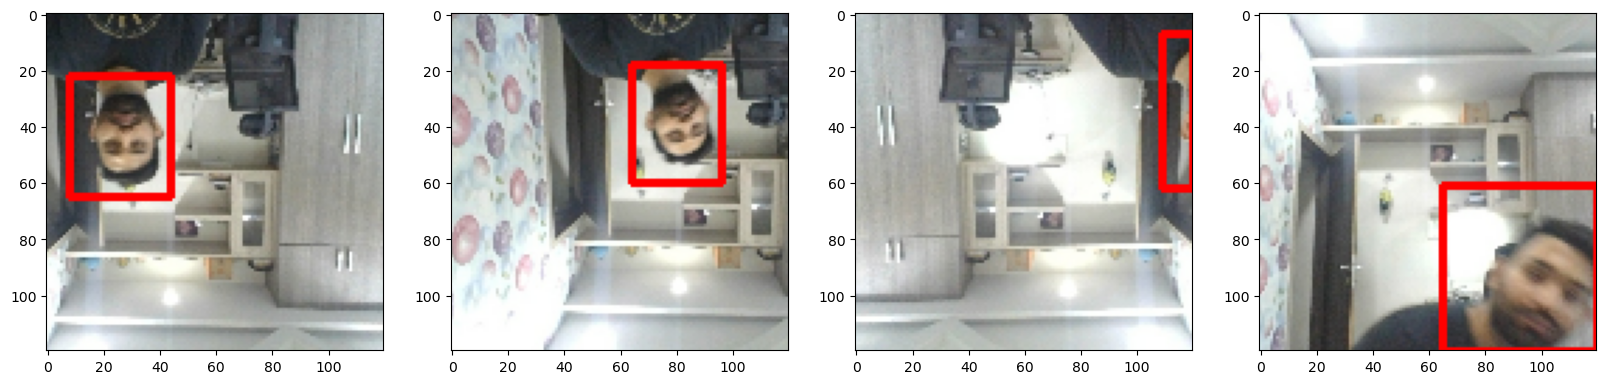

In [181]:
fig,ax = plt.subplots(ncols = 4,figsize=(20,20))
for idx in range(4):
    sample_img = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_img,
                 tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                 tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                     (255,0,0), 2)
    ax[idx].imshow(sample_img)

sample_image = res[0][idx]: This line retrieves the image at the current index idx from the variable res. It assumes that res is a tuple or list containing elements at specific indices. In this case, the image data is expected to be stored at index 0 of res.

sample_coords = res[1][1][idx]: This line retrieves the bounding box coordinates at the current index idx from the variable res. It assumes that res is structured in a way that the bounding box information is nested within lists or arrays. Specifically:

res[1] accesses the second element of res, which is expected to be a list or array containing bounding box information.
res[1][1] accesses the second element of the nested list, which is expected to contain the bounding box coordinates for a single object.
Finally, res[1][1][idx] retrieves the bounding box coordinates at index idx within that list, assuming that each index corresponds to a different object's bounding box.

# Starting with Deep Learning 

In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [56]:
vgg = VGG16(include_top = False)

In [57]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [58]:
def build_model():
    input_layer = Input(shape = (120,120,3))
    
    vgg = VGG16(include_top = False)(input_layer)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048,activation = 'relu')(f1)
    class2 = Dense(1,activation = 'sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048,activation = 'relu')(f2)
    regress2 = Dense(4,activation = 'sigmoid')(regress1)
    
    facetracker = Model(inputs = input_layer, outputs = [class2,regress2])
    return facetracker

The provided code defines a neural network model using the Keras API in TensorFlow. This model is designed for a specific task that involves both classification and regression. Let's break down the code in detail:

1. **`input_layer = Input(shape=(120, 120, 3))`**:
   - This line defines the input layer for the neural network. It specifies that the input data should have a shape of (120, 120, 3), indicating images with a resolution of 120x120 pixels and three color channels (RGB).

2. **`vgg = VGG16(include_top=False)(input_layer)`**:
   - This line creates an instance of the VGG16 model (with the top layers excluded) and applies it to the `input_layer`. This step extracts features from the input images using the pre-trained VGG16 model.
   - `include_top=False` means that only the convolutional base of the VGG16 model is used, and the fully connected layers responsible for classification are not included.

3. **Classification Model**:
   - The classification part of the model is responsible for classifying objects in the input images. It consists of the following layers:
     - **`f1 = GlobalMaxPooling2D()(vgg)`**: This layer applies global max-pooling to the feature maps extracted by the VGG16 model. Global max-pooling reduces the spatial dimensions of the feature maps while retaining the most important information.
     - **`class1 = Dense(2048, activation='relu')(f1)`**: This fully connected layer has 2048 units and uses the ReLU activation function. It learns to extract high-level features from the pooled feature maps.
     - **`class2 = Dense(1, activation='sigmoid')(class1)`**: This final layer has a single unit with a sigmoid activation function, making it suitable for binary classification tasks. It outputs a probability score indicating the presence or absence of a specific object.

4. **Bounding Box Model**:
   - The bounding box part of the model is responsible for predicting the coordinates of bounding boxes around objects in the input images. It also consists of several layers similar to the classification part:
     - **`f2 = GlobalMaxPooling2D()(vgg)`**: Like in the classification part, this layer applies global max-pooling to the same feature maps.
     - **`regress1 = Dense(2048, activation='relu')(f2)`**: Another fully connected layer with 2048 units and ReLU activation function for feature extraction.
     - **`regress2 = Dense(4, activation='sigmoid')(regress1)`**: This final layer has four units, corresponding to the four coordinates (x, y, width, height) of a bounding box. It uses a sigmoid activation function to ensure that the predicted coordinates are within the range [0, 1].

5. **Model Compilation and Output**:
   - Finally, the code creates a Keras `Model` by specifying the input and output layers. The input is the `input_layer`, and the outputs are the classification output (`class2`) and the bounding box regression output (`regress2`).
   - The model is then returned as `facetracker`.

This architecture is suitable for tasks that involve detecting and classifying objects in images, especially when both object presence/absence and bounding box coordinates need to be predicted. The model can be further compiled, trained, and evaluated using appropriate data and loss functions for the specific task.

In [59]:
facetracker = build_model()

In [60]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [61]:
X,y = train.as_numpy_iterator().next()

In [62]:
y

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.3684, 0.4624, 1.    ],
        [0.    , 0.    , 0.3123, 0.581 ],
        [0.5396, 0.0883, 0.9883, 0.5415],
        [0.562 , 0.4734, 0.908 , 0.8325],
        [0.442 , 0.172 , 0.7793, 0.5396],
        [0.6943, 0.4343, 1.    , 1.    ],
        [0.3442, 0.1335, 0.639 , 0.4883],
        [0.438 , 0.4248, 0.9424, 0.861 ]], dtype=float16))

In [63]:
X.shape

(8, 120, 120, 3)

In [64]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 3s 3s/step


In [65]:
classes, coords

(array([[0.8319771 ],
        [0.7393914 ],
        [0.77048856],
        [0.66628885],
        [0.69355583],
        [0.75807774],
        [0.7471704 ],
        [0.7742882 ]], dtype=float32),
 array([[0.5102151 , 0.57454073, 0.39657548, 0.69235915],
        [0.54061913, 0.5635538 , 0.38639355, 0.7582776 ],
        [0.5664465 , 0.5453944 , 0.4537307 , 0.69926953],
        [0.4085972 , 0.61078537, 0.44067544, 0.5926364 ],
        [0.50440556, 0.5714017 , 0.374778  , 0.61425704],
        [0.5594556 , 0.643749  , 0.40574753, 0.66277665],
        [0.64313143, 0.6295026 , 0.43099385, 0.67726696],
        [0.47351944, 0.5769798 , 0.4493147 , 0.6622977 ]], dtype=float32))

In [66]:
len(train)

450

In [67]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 - 1)/batches_per_epoch

In [68]:
lr_decay

0.0007407407407407406

The provided code calculates the learning rate decay value based on the number of batches per epoch in a training dataset. Let's break it down step by step:

1. **`batches_per_epoch = len(train)`**:
   - This line calculates the number of batches (mini-batches) per epoch in a training dataset. `train` is assumed to be a dataset object that contains training samples. The `len(train)` function call returns the total number of mini-batches in the dataset.

2. **`lr_decay = (1./0.75 - 1) / batches_per_epoch`**:
   - This line computes the learning rate decay value (`lr_decay`) using a formula.
   - The formula `(1. / 0.75 - 1)` calculates the desired learning rate decay factor. In this case, `0.75` represents the desired decay factor.
   - The result of this formula is then divided by `batches_per_epoch`. This division scales the decay factor based on the number of mini-batches per epoch.

The purpose of learning rate decay is to gradually reduce the learning rate during training. It can help improve training stability and convergence. The specific value `0.75` used here represents the desired decay factor, and the formula adjusts it based on the number of batches per epoch.

Typically, during training, the learning rate is multiplied by the decay factor after each epoch or after a certain number of batches. This gradual reduction in learning rate allows the model to fine-tune its parameters as it gets closer to convergence.

In practice, you would use this `lr_decay` value along with an initial learning rate when configuring the optimizer for your neural network training. The optimizer would then automatically adjust the learning rate during training according to the specified decay schedule.

In [71]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [79]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

h_true and w_true are calculated for the ground truth bounding boxes (y_true).

h_true represents the height of the ground truth bounding boxes. It is calculated as the difference between the y-coordinate of the bottom-right corner (y_true[:,3]) and the y-coordinate of the top-left corner (y_true[:,1]).
w_true represents the width of the ground truth bounding boxes. It is calculated as the difference between the x-coordinate of the bottom-right corner (y_true[:,2]) and the x-coordinate of the top-left corner (y_true[:,0]).
Similarly, h_pred and w_pred are calculated for the predicted bounding boxes (yhat).

h_pred represents the predicted height of the bounding boxes.
w_pred represents the predicted width of the bounding boxes.

In [80]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [82]:
localization_loss(y[1],coords).shape

TensorShape([])

In [84]:
localization_loss(y[1],coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9455795>

In [85]:
localization_loss(y[1],coords).numpy()

4.9455795

In [86]:
classloss(y[1],coords)

<tf.Tensor: shape=(), dtype=float32, numpy=0.72307456>

In [87]:
classloss(y[1],coords).numpy()

0.72307456

In [88]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.9455795>

## Create Custom Model Class

In [98]:
class FaceTracker(Model): 
    def __init__(self, facetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = facetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            # This calculates the classification loss (batch_classloss) by comparing the ground truth class 
            # labels (y[0]) with the predicted classes.
            
            batch_classloss = self.closs(y[0], classes)
            
            # batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords): 
            # This calculates the localization loss (batch_localizationloss) by comparing the ground truth 
            # bounding box coordinates (y[1]) with the predicted coordinates (coords). 
            # It also casts the ground truth to float32 to match the data type.
            
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [101]:
model = FaceTracker(facetracker)

In [106]:
model.compile(opt, classloss, regressloss)

In [107]:
logdir = 'logs'

In [108]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [109]:
hist = model.fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/10
450/450 [==============================] - 1315s 3s/step - total_loss: 0.3778 - class_loss: 0.0761 - regress_loss: 0.3398 - val_total_loss: 0.1278 - val_class_loss: 0.0279 - val_regress_loss: 0.1138
Epoch 2/10
450/450 [==============================] - 1281s 3s/step - total_loss: 0.1309 - class_loss: 0.0281 - regress_loss: 0.1169 - val_total_loss: 0.0462 - val_class_loss: 0.0158 - val_regress_loss: 0.0383
Epoch 3/10
450/450 [==============================] - 1016s 2s/step - total_loss: 0.0778 - class_loss: 0.0165 - regress_loss: 0.0696 - val_total_loss: 0.0907 - val_class_loss: 0.0265 - val_regress_loss: 0.0775
Epoch 4/10
450/450 [==============================] - 920s 2s/step - total_loss: 0.0683 - class_loss: 0.0120 - regress_loss: 0.0623 - val_total_loss: 0.0082 - val_class_loss: 3.9411e-04 - val_regress_loss: 0.0080
Epoch 5/10
450/450 [==============================] - 921s 2s/step - total_loss: 0.0446 - class_loss: 0.0100 - regress_loss: 0.0396 - val_total_loss: 0.0244 

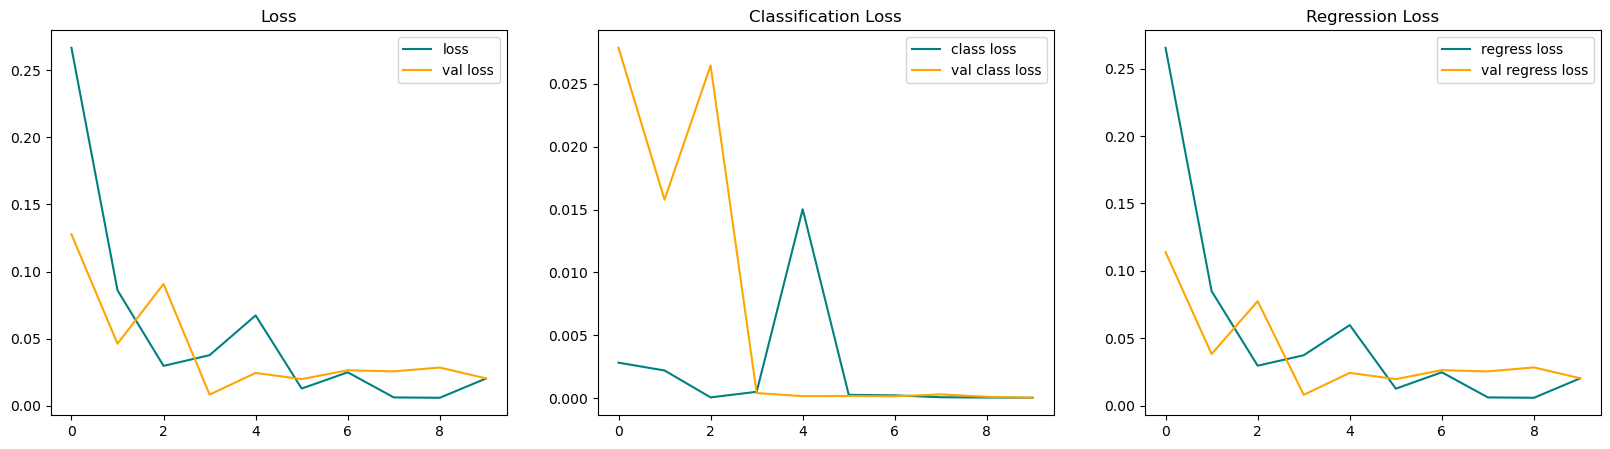

In [110]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [133]:
test_data = test.as_numpy_iterator()

In [182]:
test_sample = test_data.next()

In [183]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 382ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


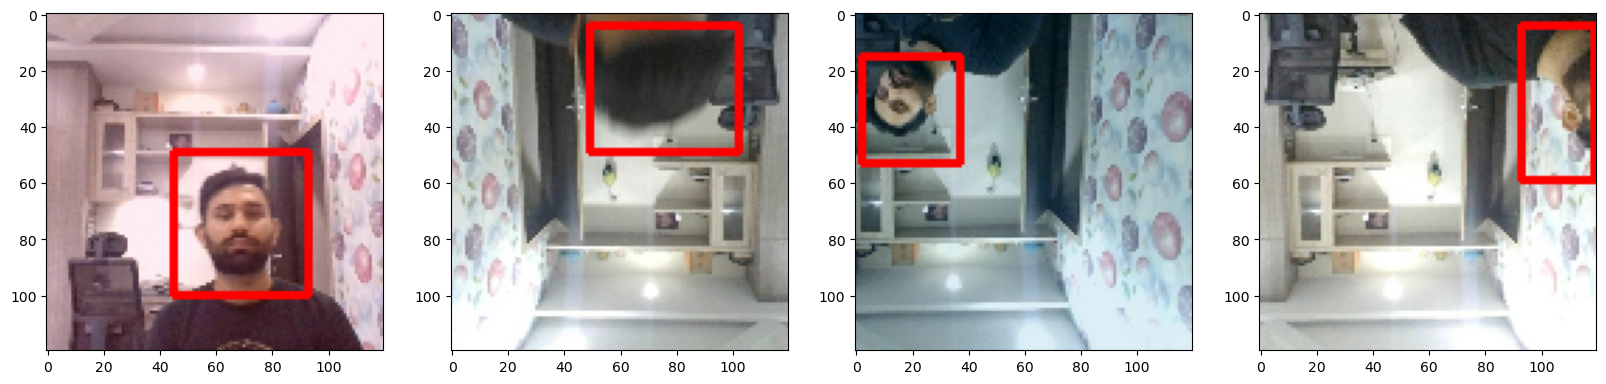

In [184]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [123]:
from tensorflow.keras.models import load_model

In [124]:
facetracker.save('facetracker.h5')

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
facetracker = load_model('facetracker.h5')

In [185]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 87ms/step
